In [1]:
%matplotlib inline

In [28]:
import torch
import torch.nn as nn
import torch.functional as F

from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# ANN on MNIST

In [6]:
transform = transforms.ToTensor()

In [8]:
train_data = datasets.MNIST(root = "../Data", train = True, download = True, transform = transform)

In [9]:
test_data = datasets.MNIST(root = "../Data", train = False, download = True, transform = transform)

In [10]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [11]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [12]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [15]:
train_data[0][0] #image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [16]:
train_data[0][1] # label

5

In [17]:
image, label = train_data[0]

In [19]:
image.shape # 1-> grayscale image

torch.Size([1, 28, 28])

In [20]:
label

5

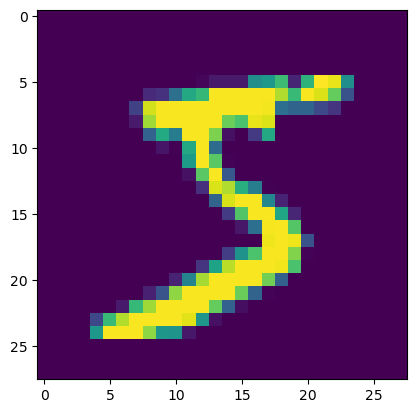

In [23]:
plt.imshow(image.reshape((28,28))) # default colormapping is "viridis"

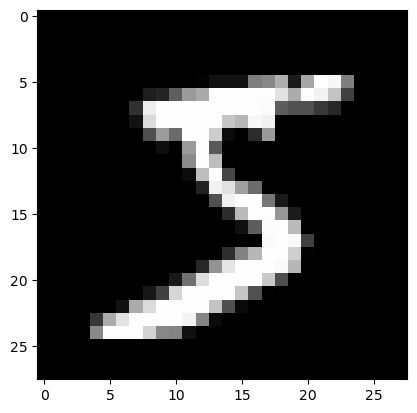

In [24]:
plt.imshow(image.reshape((28,28)), cmap = "gray")

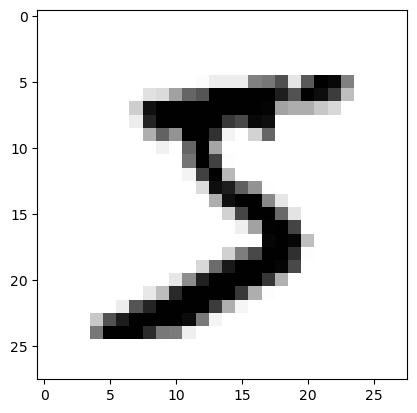

In [26]:
plt.imshow(image.reshape((28,28)), cmap = "gist_yarg") # negative to the above image

In [30]:
torch.manual_seed(53)

train_loader = DataLoader(train_data, batch_size = 100, shuffle = True)
test_loader = DataLoader(test_data, batch_size = 500, shuffle = False)

In [32]:
np.set_printoptions(formatter = dict(int=lambda x: f"{x: 4}"))

In [33]:
# first batch
for images, labels in train_loader:
    break

In [38]:
images.shape, labels.shape # the number of images and labels is equal to the batch size

(torch.Size([100, 1, 28, 28]), torch.Size([100]))

In [40]:
print('Labels: ', labels[:10].numpy()) # printing the first ten labels

Labels:  [   9    7    1    6    0    1    6    0    7    9]


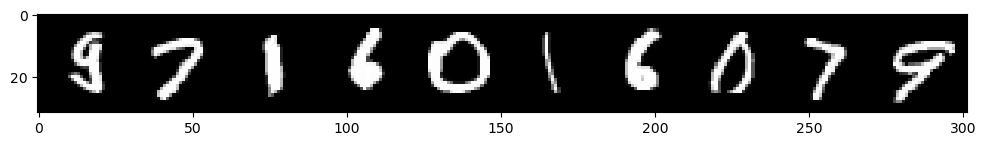

In [42]:
im = make_grid(images[:10], nrow=10)  # the default nrow is 8
plt.figure(figsize=(12,6)) 
plt.imshow(np.transpose(im.numpy(), (1, 2, 0))) # transpose the images from (channel, width, height) to WHC

## __ANN__

In [43]:
class MultilayerPerceptron(nn. Module):
    def __init__(self, input_size = 784, output_size = 10, layers = [120, 84]):
        super().__init__()
        self.fc1 = nn.Linear(input_size, layers[0])
        self.fc2 = nn.Linear(layers[0], layers[1])
        self.fc3 = nn.Linear(layers[1], output_size)

    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.log_softmax(self.fc3(X), dim = 1)

        return X

In [44]:
torch.manual_seed(53)

model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [46]:
for param in model.parameters():
    print(param.numel())

94080
120
10080
84
840
10


In [47]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [49]:
images.shape

torch.Size([100, 1, 28, 28])

 ---> [100, 784] by using .view

In [50]:
images.view(100, -1).shape

torch.Size([100, 784])